Se realiza la cantidad de picos presentes en una escala de 71 muestras para observar el nivel comportamiento (o sea, % de aciertos).

In [1]:
import csv
from astropy.io import fits
import pandas as pd

muestra = pd.read_csv('../Etapa_1_ObservacionDeDatos/planilla_imagenes.csv',  sep=';')
muestra.head()

,MAIN_ID,OBJECT,PLATE_N,NAXIS1,NAXIS2,YEAR,SPECTRO,NOISY,LETTERS,ABSENT,OVERLAP
0,HD 166734,HD 166734,A4451,1382,2952,1976,4,T,T,F,F
1,* bet01 Mon,Beta Mon A,A4452,1233,2952,1976,3,T,F,F,T
2,* bet01 Mon,Beta Mon A,A4453,1364,2880,1976,3,T,T,F,T
3,NGC 2346,NGC 2346,A4505,1065,2736,1976,2,F,F,F,T
4,HD 93162,HD 93162,A4514,1420,2808,1976,3,T,F,F,T


Se va acceder a los 71 elementos dentro de la planilla para identificar su imagen correspondiente de acuedo al campo PLATE_N como referencia.

In [2]:
import sys
sys.path.append("..") #Es necesario para importar Recursos.py

import Recursos

dirImg = Recursos.obtenerDirImagenes()

#nota mental: luego de importar el módulo y haberlo ejecutado, toda moficación posterior dentro del script no se verá reflejada, como por ejemplo algún cambio en el nombre de los métodos
lista = Recursos.obtenerLista(dirImg)

In [3]:
#muestra = muestra.drop(['Unnamed: 11'], axis=1)  #se descarta la última col. vacía
#list(muestra)
#muestra = muestra.rename(columns={'MAIN-ID':'MAIN_ID', 'PLATE-N':'PLATE_N'})
df = pd.DataFrame(muestra.values, columns = list(muestra))

In [4]:
#se confirma que la generación de nombres de archivos sean los correctos
#print('cant arch: '+str(len(listaAux)))
#ok = 0
#for arch in listaAux:
#    if (lista.count(arch)):
#        ok +=1
#print(ok)

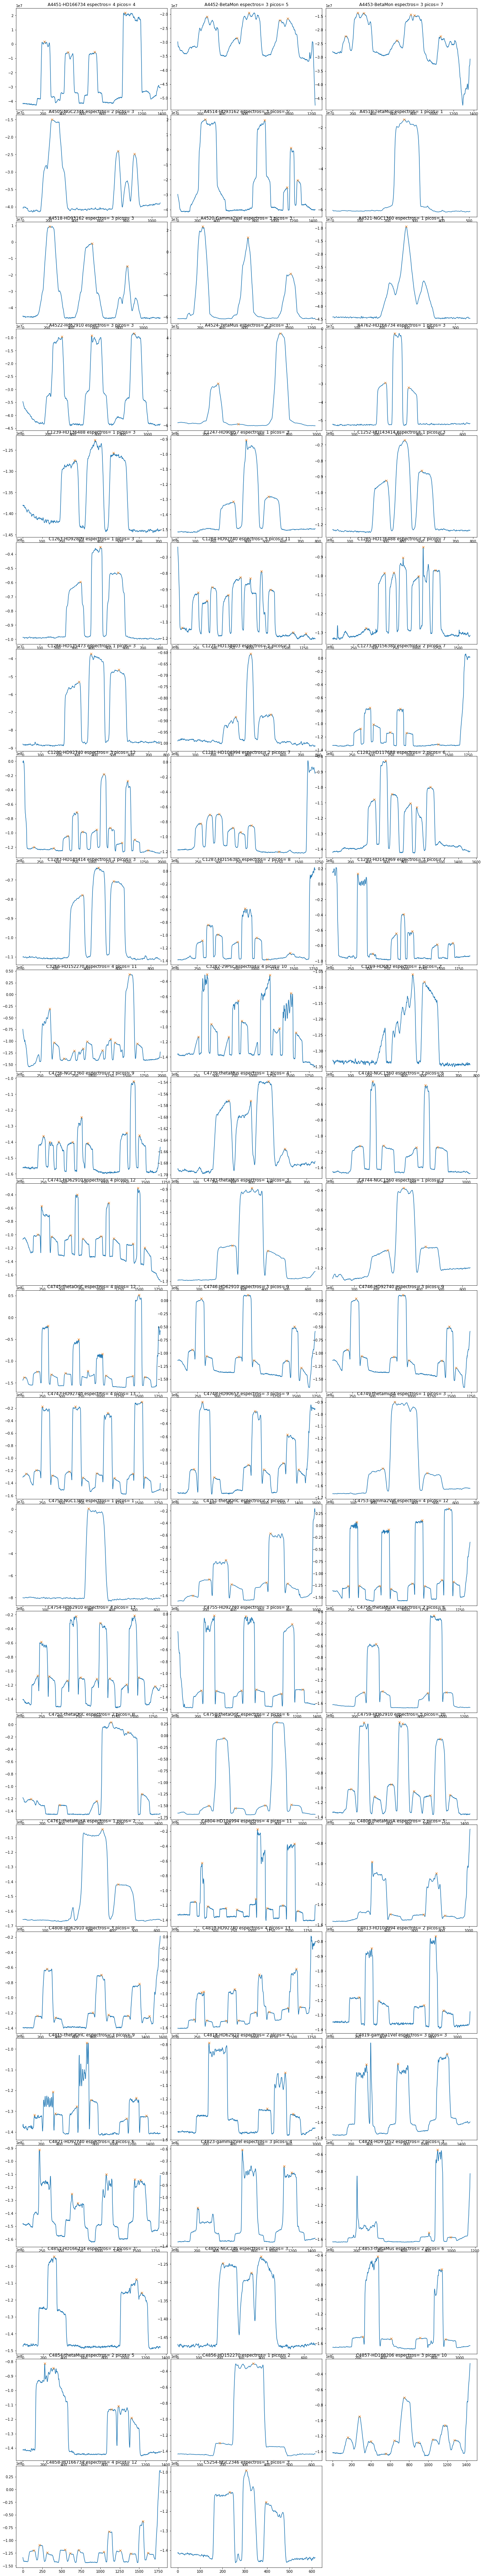

In [5]:
fil = 24 
col = 3  #24*3 = 72 imgs totales
nroImg = 1
aciertos = 0
sin_aciertos = 0
listaSinAciertos = []
#pasar plot?
marco = Recursos.ajustarMarcosGraficos(20)  #dimensión del plot
for row in df.itertuples():
    nombreImg = Recursos.getDatos(row.PLATE_N, row.OBJECT)
    Recursos.ajustarGraficos(marco,fil,col,nroImg)
    resp = Recursos.graficarPicos(dirImg,nombreImg,row.SPECTRO)
    if (resp): aciertos +=1
    else: 
        sin_aciertos +=1
        listaSinAciertos.append(nombreImg)
    nroImg += 1

In [6]:
print('true: '+ str(aciertos))
print('false: '+str(sin_aciertos))

true: 8
false: 63
